<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           213 non-null    int64  
 1   Country                        213 non-null    object 
 2   Exports                        213 non-null    int64  
 3   Export_Percentage_Global       213 non-null    float64
 4   Export_Rank                    213 non-null    int64  
 5   Imports                        213 non-null    int64  
 6   Import_Percentage_Global       213 non-null    float64
 7   Import_Rank                    213 non-null    int64  
 8   Total_Trade                    213 non-null    int64  
 9   Total_Trade_Percentage_Global  213 non-null    float64
 10  Trade_Rank                     213 non-null    int64  
 11  Trade_Deficit                  213 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 2

C:\Users\chemi\AppData\Local\Temp\ipykernel_8244\3742356906.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Exports', y='Country', data=top_exports, palette='Blues')


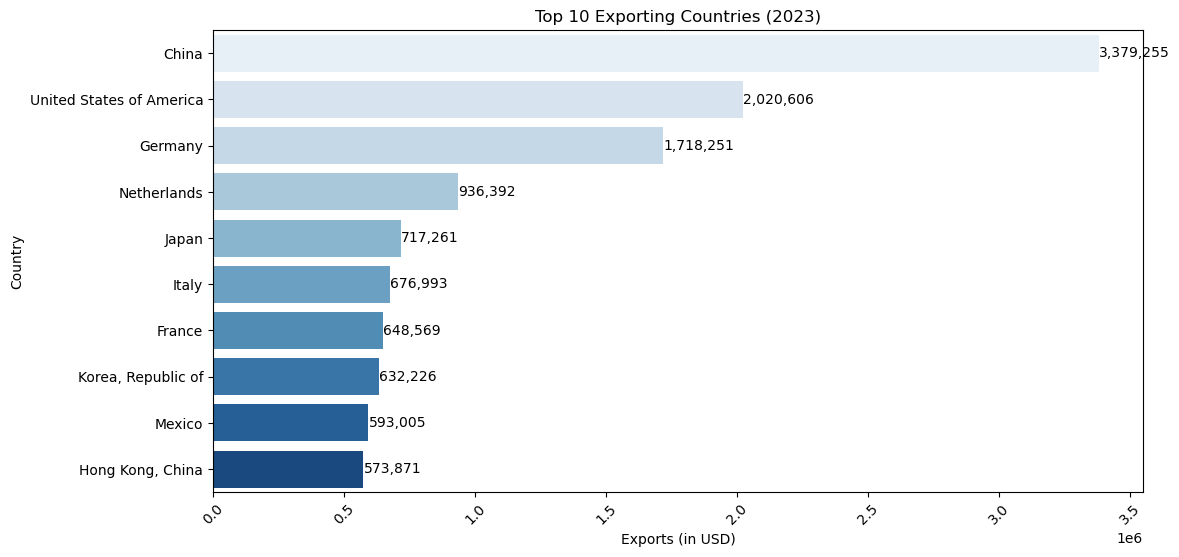

C:\Users\chemi\AppData\Local\Temp\ipykernel_8244\3742356906.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Imports', y='Country', data=top_imports, palette='Reds')


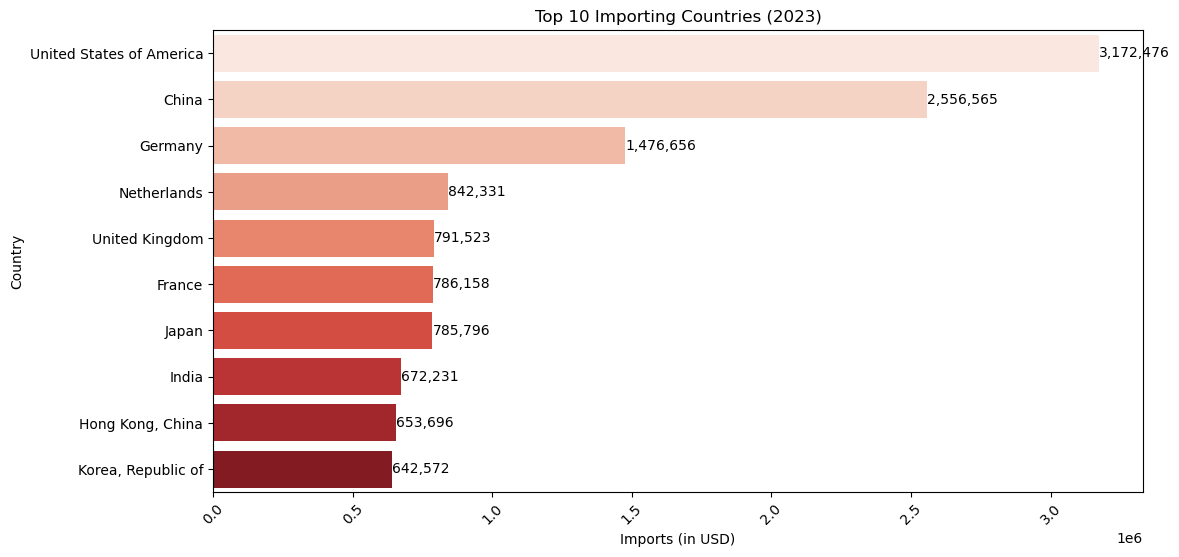

C:\Users\chemi\AppData\Local\Temp\ipykernel_8244\3742356906.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Trade_Deficit', y='Country', data=top_deficit, palette='Purples')


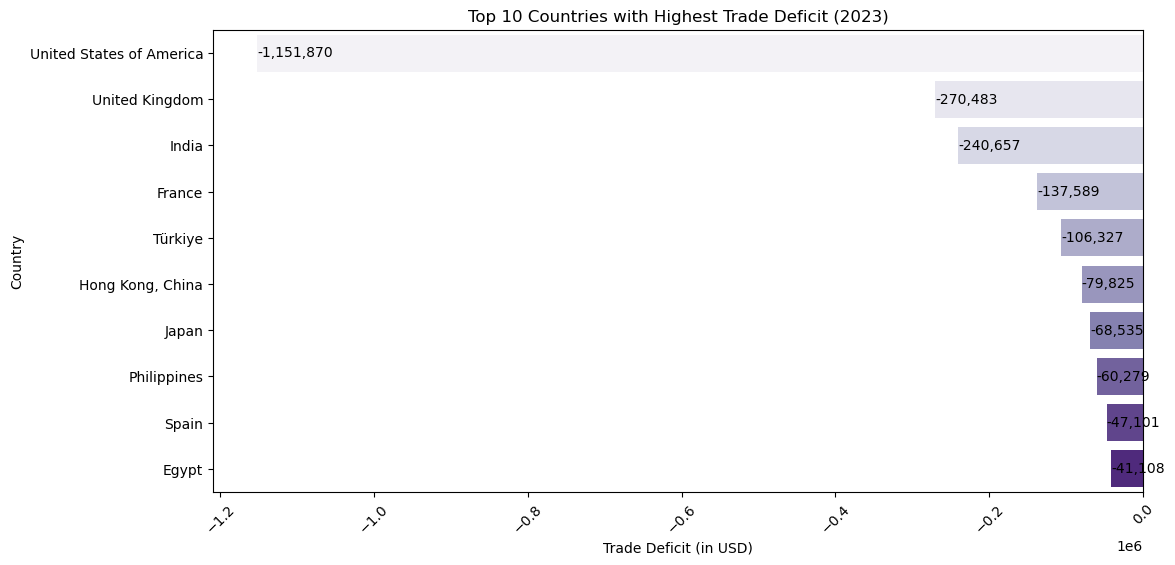

C:\Users\chemi\AppData\Local\Temp\ipykernel_8244\3742356906.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='Greens')


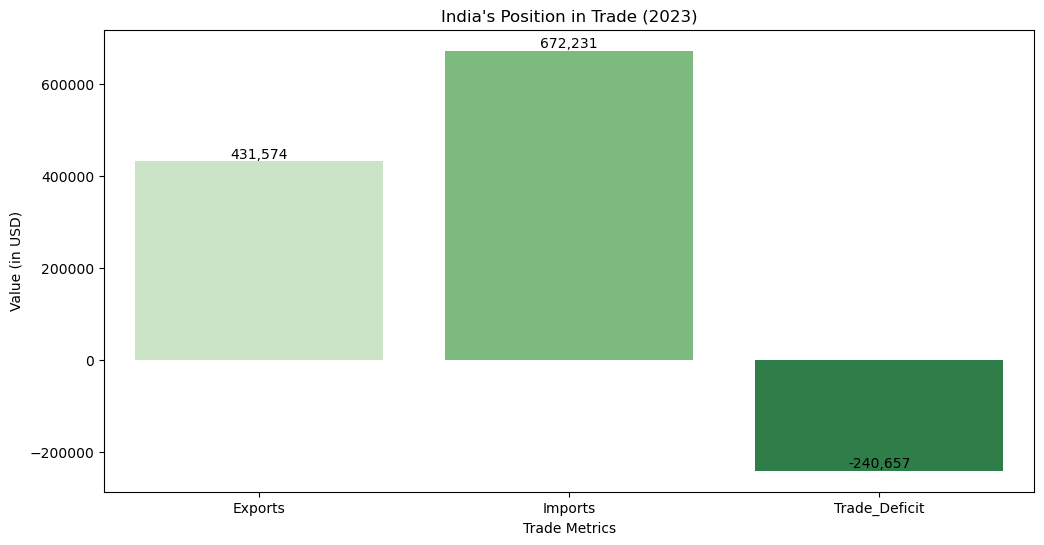

C:\Users\chemi\AppData\Local\Temp\ipykernel_8244\3742356906.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranks, y=rank_values, palette='Blues')


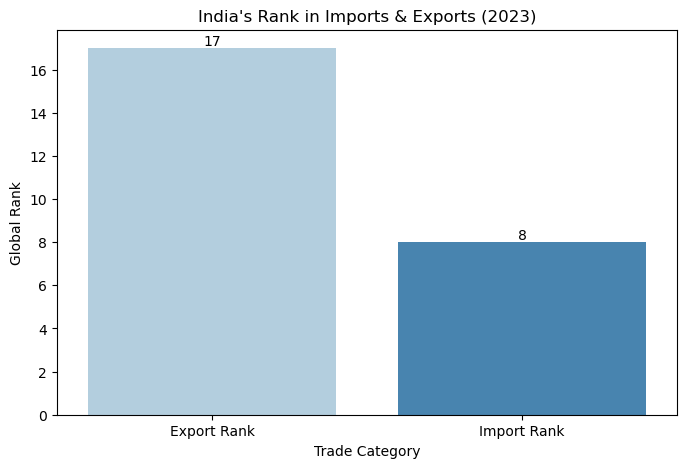

C:\Users\chemi\AppData\Local\Temp\ipykernel_8244\3742356906.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Trade_Deficit', data=comparison_df, palette='Oranges')


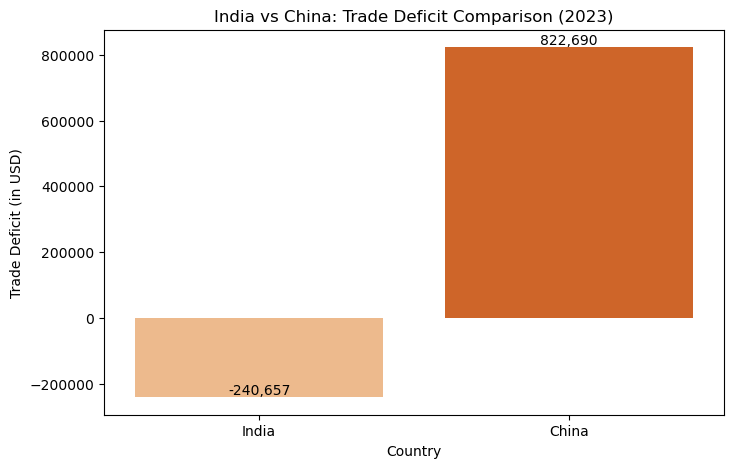

C:\Users\chemi\AppData\Local\Temp\ipykernel_8244\3742356906.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Trade_Deficit', y='Country', data=top_surplus, palette='Greens')


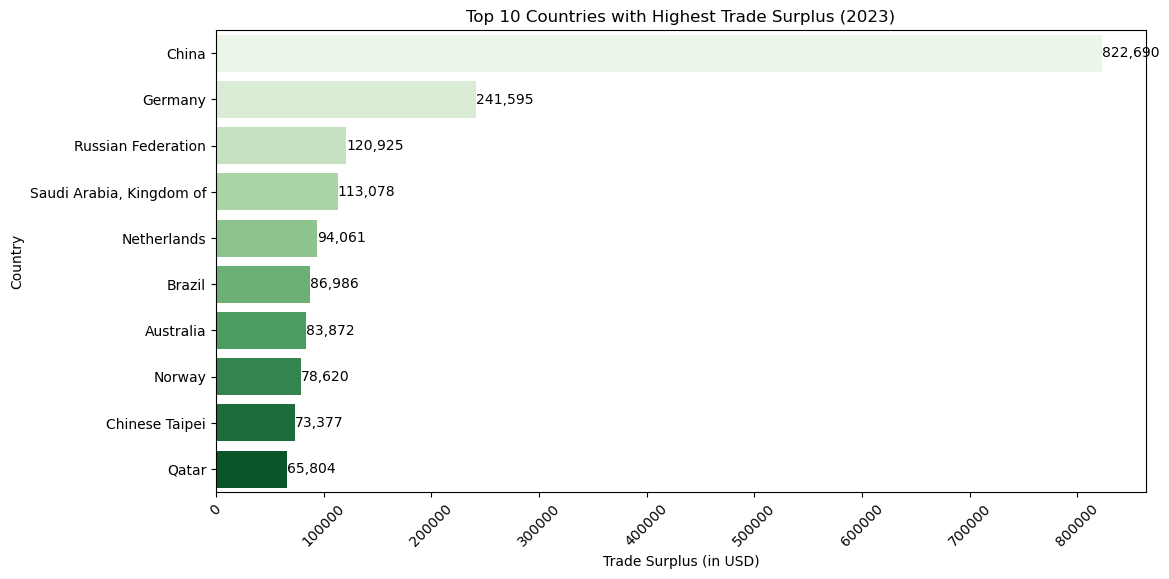

Analysis complete. PDF report generated.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF

# Load the dataset
file_path = "C:\\Users\\chemi\\Downloads\\PROJECT -World Merchandise Trade  (Bigquery Project)\\BigQuery Output Result\\Global Trade Rankings (2023)-Country-Wise Export, Import, and Trade Deficit Analysis.csv"
df = pd.read_csv(file_path)

# Display basic info
df.info()
print(df.head())

# Summary statistics
print(df.describe())

# Handling missing values
df.dropna(inplace=True)

# Top 10 countries by exports
top_exports = df.sort_values(by='Exports', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Exports', y='Country', data=top_exports, palette='Blues')
plt.xlabel('Exports (in USD)')
plt.ylabel('Country')
plt.title('Top 10 Exporting Countries (2023)')
plt.xticks(rotation=45)
for index, value in enumerate(top_exports['Exports']):
    plt.text(value, index, f'{value:,.0f}', va='center')
plt.show()

# Top 10 countries by imports
top_imports = df.sort_values(by='Imports', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Imports', y='Country', data=top_imports, palette='Reds')
plt.xlabel('Imports (in USD)')
plt.ylabel('Country')
plt.title('Top 10 Importing Countries (2023)')
plt.xticks(rotation=45)
for index, value in enumerate(top_imports['Imports']):
    plt.text(value, index, f'{value:,.0f}', va='center')
plt.show()

# Trade deficit analysis
df['Trade_Deficit'] = df['Exports'] - df['Imports']
top_deficit = df.sort_values(by='Trade_Deficit', ascending=True).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Trade_Deficit', y='Country', data=top_deficit, palette='Purples')
plt.xlabel('Trade Deficit (in USD)')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Trade Deficit (2023)')
plt.xticks(rotation=45)
for index, value in enumerate(top_deficit['Trade_Deficit']):
    plt.text(value, index, f'{value:,.0f}', va='center')
plt.show()

# India's Position in Imports, Exports, and Trade Deficit
india_data = df[df['Country'] == 'India']
plt.figure(figsize=(12, 6))
metrics = ['Exports', 'Imports', 'Trade_Deficit']
values = [india_data['Exports'].values[0], india_data['Imports'].values[0], india_data['Trade_Deficit'].values[0]]
sns.barplot(x=metrics, y=values, palette='Greens')
plt.xlabel('Trade Metrics')
plt.ylabel('Value (in USD)')
plt.title("India's Position in Trade (2023)")
for index, value in enumerate(values):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom')
plt.show()

# India’s Rank in 2023 Imports and Exports
plt.figure(figsize=(8, 5))
ranks = ['Export Rank', 'Import Rank']
rank_values = [india_data['Export_Rank'].values[0], india_data['Import_Rank'].values[0]]
sns.barplot(x=ranks, y=rank_values, palette='Blues')
plt.xlabel('Trade Category')
plt.ylabel('Global Rank')
plt.title("India's Rank in Imports & Exports (2023)")
for index, value in enumerate(rank_values):
    plt.text(index, value, f'{value}', ha='center', va='bottom')
plt.show()

# Comparison of India and China Trade Deficit
china_data = df[df['Country'] == 'China']
comparison_df = pd.DataFrame({
    'Country': ['India', 'China'],
    'Trade_Deficit': [india_data['Trade_Deficit'].values[0], china_data['Trade_Deficit'].values[0]]
})
plt.figure(figsize=(8, 5))
sns.barplot(x='Country', y='Trade_Deficit', data=comparison_df, palette='Oranges')
plt.xlabel('Country')
plt.ylabel('Trade Deficit (in USD)')
plt.title("India vs China: Trade Deficit Comparison (2023)")
for index, value in enumerate(comparison_df['Trade_Deficit']):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom')
plt.show()

# Top 10 Trade Surplus Countries
top_surplus = df.sort_values(by='Trade_Deficit', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Trade_Deficit', y='Country', data=top_surplus, palette='Greens')
plt.xlabel('Trade Surplus (in USD)')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Trade Surplus (2023)')
plt.xticks(rotation=45)
for index, value in enumerate(top_surplus['Trade_Deficit']):
    plt.text(value, index, f'{value:,.0f}', va='center')
plt.show()

# Generate PDF Report
class PDFReport(FPDF):
    def header(self):
        self.set_font("Arial", "B", 16)
        self.cell(200, 10, "Global Trade Rankings (2023) Analysis", ln=True, align="C")
        self.ln(10)
    
pdf = PDFReport()
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, "This report provides insights into global trade rankings for 2023, highlighting key trends in exports, imports, and trade deficit analysis.")
pdf.ln(5)
pdf.multi_cell(0, 10, "Key Findings:")
pdf.multi_cell(0, 10, f"1. The top exporting country in 2023 is {df.loc[df['Exports'].idxmax(), 'Country']} with {df['Exports'].max():,.0f} USD in exports.")
pdf.multi_cell(0, 10, f"2. The top importing country in 2023 is {df.loc[df['Imports'].idxmax(), 'Country']} with {df['Imports'].max():,.0f} USD in imports.")
pdf.multi_cell(0, 10, f"3. The country with the highest trade deficit is {df.loc[df['Trade_Deficit'].idxmin(), 'Country']} with a deficit of {df['Trade_Deficit'].min():,.0f} USD.")
pdf.multi_cell(0, 10, f"4. India ranks {india_data['Export_Rank'].values[0]} in exports and {india_data['Import_Rank'].values[0]} in imports globally.")
pdf.multi_cell(0, 10, f"5. India's trade deficit compared to China shows significant differences, highlighting trade patterns.")
pdf.output("Global_Trade_Report_2023_main.pdf")

print("Analysis complete. PDF report generated.")
